# ポワソン回帰

----

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# ビールの売上個数と気温の関係データ
beer = pd.read_csv('n_beer.csv')
beer.describe()

beer_number  temperature
count    30.000000    30.000000
mean      7.833333    18.063333
std       5.657362     9.169495
min       2.000000     5.000000
25%       4.000000    10.225000
50%       6.000000    17.200000
75%      11.000000    25.750000
max      22.000000    34.000000

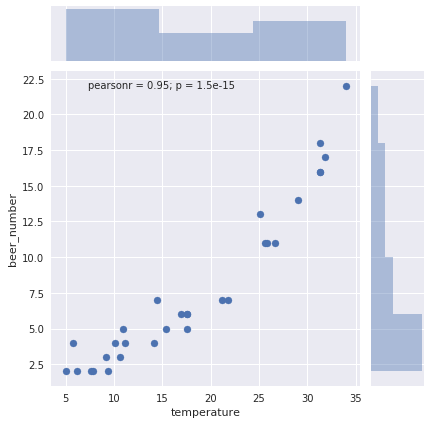

In [11]:
sns.jointplot(x='temperature', y='beer_number', data=beer)

In [5]:
# ポワソン回帰モデルの作成
pois = smf.glm(
    formula='beer_number ~ temperature',
    data=beer,
    family=sm.families.Poisson()
).fit()

pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Tue, 04 Sep 2018   Deviance:                       5.1373
Time:                        02:05:04   Pearson chi2:                     5.40
No. Iterations:                     4   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [6]:
# モデル選択
pois_null = smf.glm(
    formula='beer_number ~ 1',
    data=beer,
    family=sm.families.Poisson()
).fit()

print('Null model AIC: {:.3f}'.format(pois_null.aic))
print('+Temperature model AIC: {:.3f}'.format(pois.aic))

Null model AIC: 223.363
+Temperature model AIC: 119.343


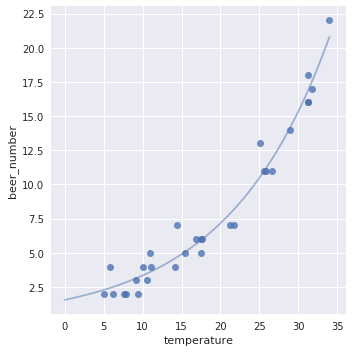

In [16]:
# ポワソン回帰のグラフ
x = np.arange(0, 35)

pred = pois.predict(
    pd.DataFrame({'temperature': x})
)

sns.lmplot(x='temperature', y='beer_number', data=beer, fit_reg=False)
plt.plot(x, pred, alpha=0.5)

----

## ポワソン回帰の回帰係数の解釈

気温が 1℃上がったとき、ビールの販売個数が○○倍になる・と解釈される。<br>
（これは、リンク関数に対数関数を使っているため）

cf) 正規線形モデルの場合はリンク関数に恒等関数を使うため、気温が気温が 1℃上がったとき、ビールの売上が○○円増える・と素直に解釈できる。

In [17]:
# 気温が 1℃のときのビールの売上個数を予測
pred_1C = pois.predict(pd.DataFrame({'temperature': [1]}))

# 気温が 2℃のときのビールの売上個数を予測
pred_2C = pois.predict(pd.DataFrame({'temperature': [2]}))

# 比を求める
pred_2C / pred_1C

0    1.079045
dtype: float64

In [22]:
# 上記の値は、回帰係数の exp をとった値と一致する
sp.exp(pois.params['temperature'])

1.079045054586893